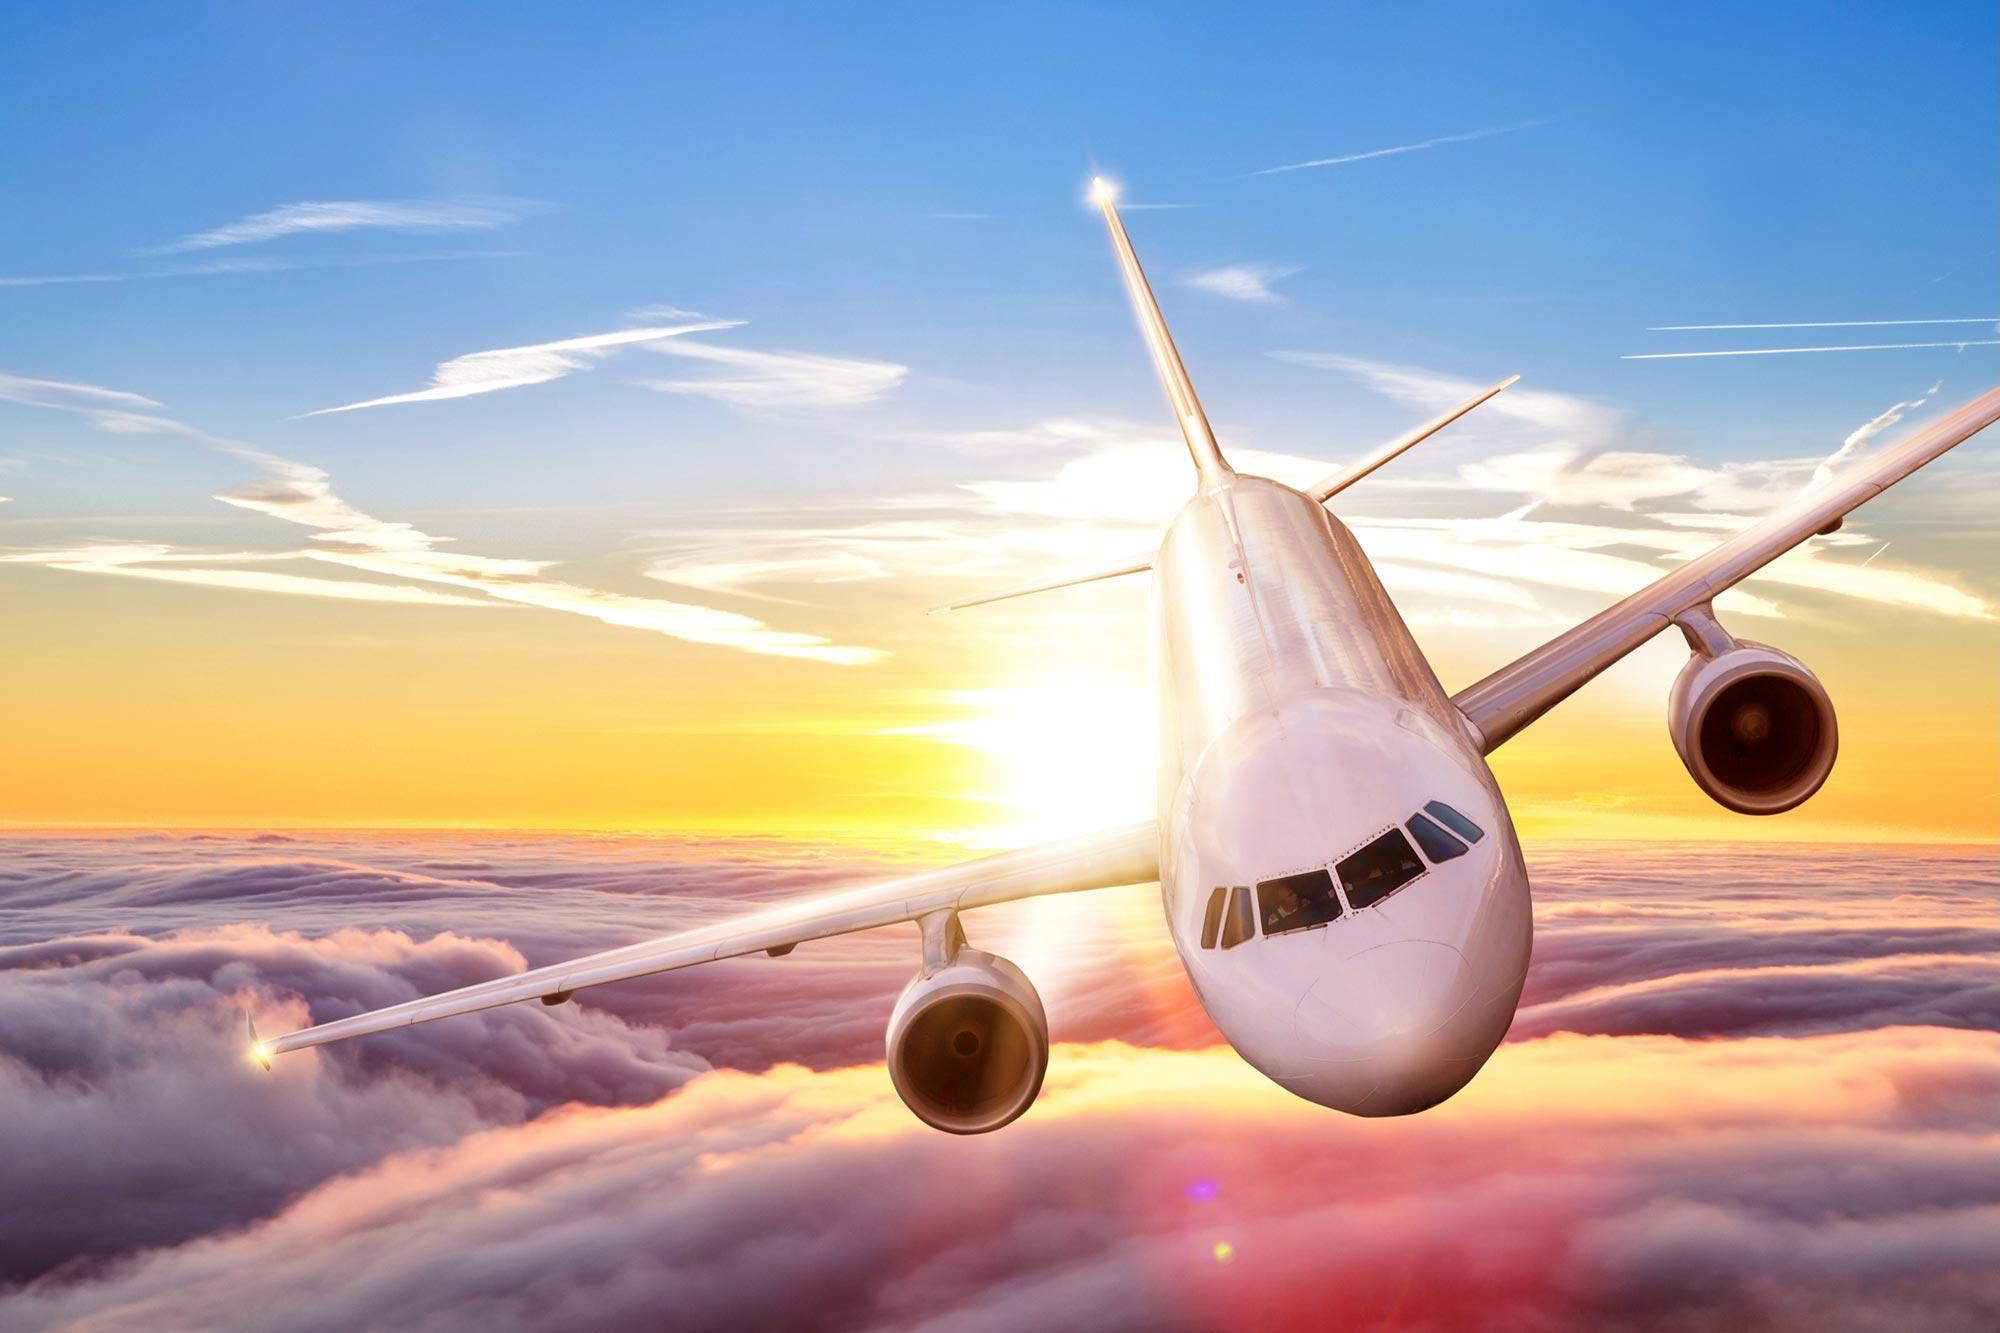

# Flight price predection 


DATASET
Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset.

FEATURES
The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.

# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# General info about data

In [2]:
data=pd.read_csv('/kaggle/input/flight-price-prediction/Clean_Dataset.csv')

In [3]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [5]:
data.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


<AxesSubplot:>

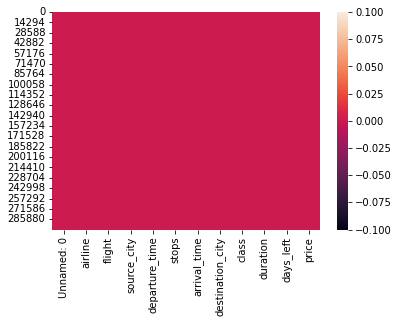

In [6]:
sns.heatmap(pd.isnull(data))#checking if there a null value

# Visualization

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'number of economy and business flight'}, xlabel='class', ylabel='count'>

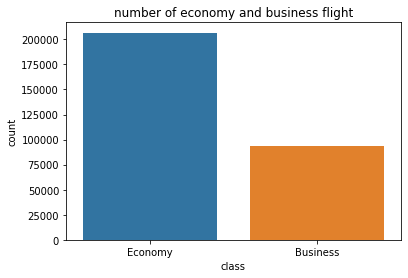

In [7]:
plt.title('number of economy and business flight')
sns.countplot(data['class'])


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'counting the number of flight based on the deuration time'}, xlabel='departure_time', ylabel='count'>

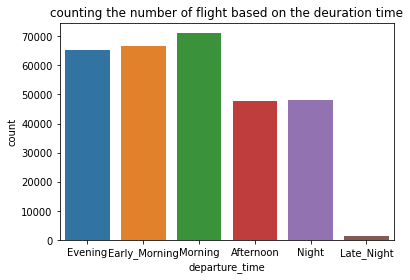

In [8]:
plt.title('counting the number of flight based on the deuration time')
sns.countplot(data['departure_time'])

<AxesSubplot:title={'center':'Airline company based on price'}, xlabel='airline', ylabel='price'>

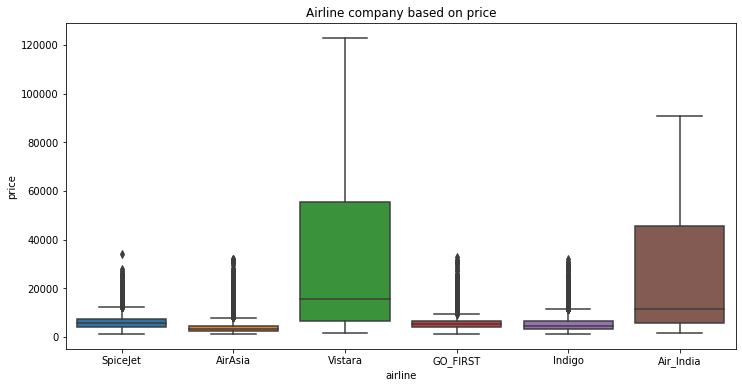

In [9]:
plt.figure(figsize=(12,6))
plt.title('Airline company based on price')
sns.boxplot(data=data,x='airline',y='price')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'count the number of flight for each company'}, xlabel='airline', ylabel='count'>

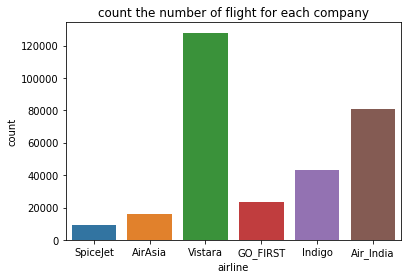

In [10]:
plt.title('count the number of flight for each company')
sns.countplot(data['airline'])

In [11]:
z=data[['airline','price']].groupby('airline').mean()#computing the mean price of each comp
z

,price
airline,
AirAsia,4091.072742
Air_India,23507.019112
GO_FIRST,5652.007595
Indigo,5324.216303
SpiceJet,6179.278881
Vistara,30396.536302


<AxesSubplot:title={'center':'mean price of each airline company'}, xlabel='airline', ylabel='price'>

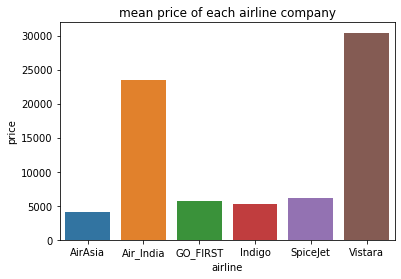

In [12]:
plt.title('mean price of each airline company')
sns.barplot(data=z,x=z.index,y='price')#mean price of each airline company..

<AxesSubplot:title={'center':'price based on dest city'}, xlabel='destination_city', ylabel='price'>

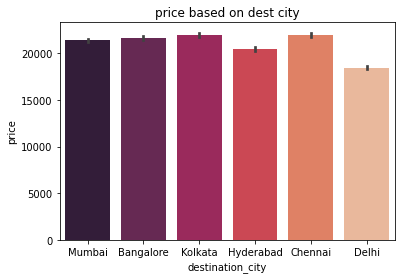

In [13]:
plt.title('price based on dest city')
sns.barplot(data=data,x='destination_city',y='price', palette="rocket")

In [14]:
h = data[['price','days_left']].groupby(['days_left']).mean()
h

,price
days_left,
1,21591.867151
2,30211.299801
3,28976.083569
4,25730.905653
5,26679.773368
6,24856.493902
7,25588.367351
8,24895.883995
9,25726.246072


<AxesSubplot:xlabel='days_left', ylabel='price'>

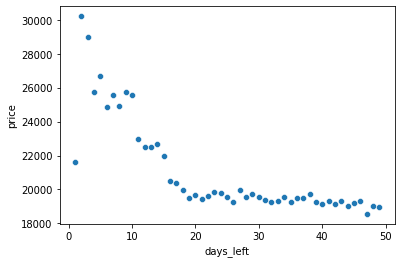

In [15]:
sns.scatterplot(data=h,x=h.index,y='price')

<AxesSubplot:xlabel='airline', ylabel='price'>

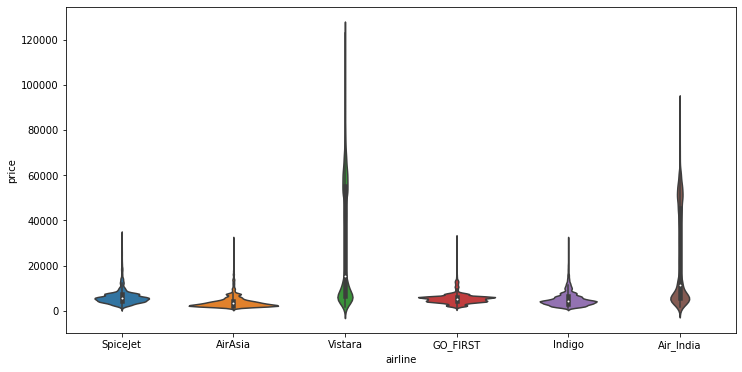

In [16]:
plt.figure(figsize=(12,6))

sns.violinplot(data=data,x='airline',y='price')

<AxesSubplot:title={'center':'price based on stops time'}, xlabel='stops', ylabel='price'>

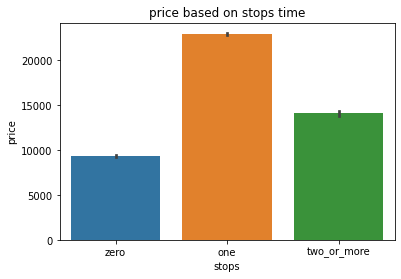

In [17]:
plt.title('price based on stops time')
sns.barplot(data=data,x='stops',y='price')

<AxesSubplot:xlabel='destination_city', ylabel='price'>

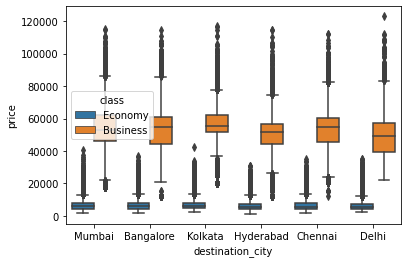

In [18]:

sns.boxplot(data=data,x='destination_city',y='price',hue='class')

<AxesSubplot:xlabel='source_city', ylabel='price'>

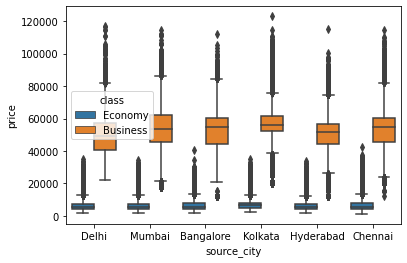

In [19]:
sns.boxplot(data=data,x='source_city',y='price',hue='class')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

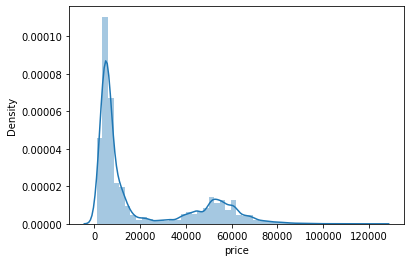

In [20]:
sns.distplot(data['price'])

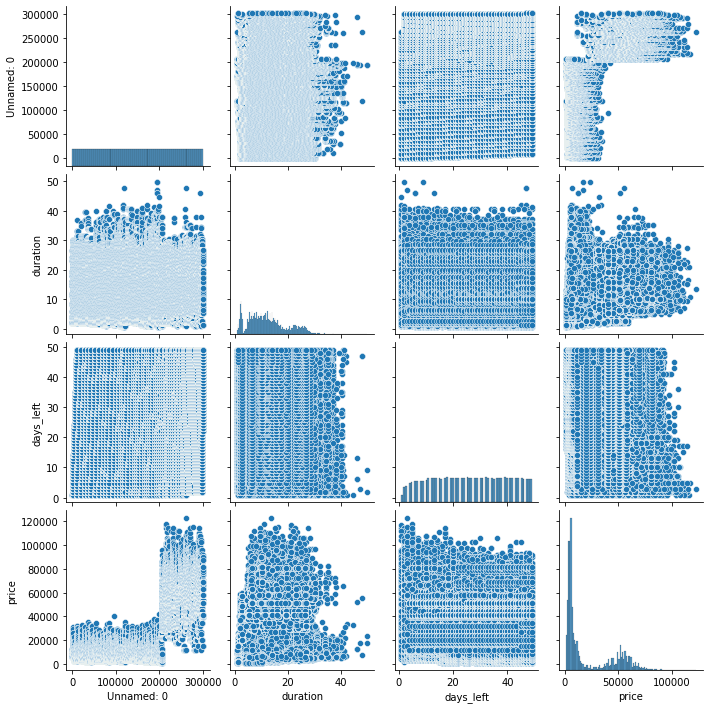

In [21]:
sns.pairplot(data)

<AxesSubplot:>

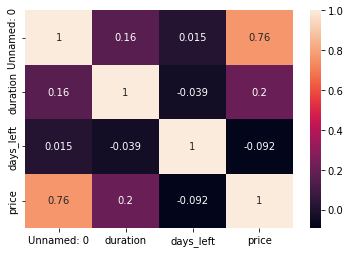

In [22]:
sns.heatmap(data=data.corr(),annot=True)

In [23]:
Feature Engineering

SyntaxError: invalid syntax (2107749883.py, line 1)

# # Feature Engineering

checking the correlation

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
data[['price','airline']].groupby('airline').mean()

In [ ]:
air={'AirAsia':1,'Indigo':2,'GO_FIRST':3,'SpiceJet':4,'Air_India':5,'Vistara':6}
stops={'zero':1, 'one':2, 'two_or_more':3}
cls={'Economy':1,'Business':2}

In [ ]:
lower_limit = data['price'].mean() - 3*data['price'].std()
upper_limit = data['price'].mean() + 3*data['price'].std()
data = data[data['price'] < upper_limit]

In [ ]:
data=data.drop(['Unnamed: 0','flight'],axis=1)

In [ ]:
data=pd.get_dummies(data=data,columns=['source_city','destination_city'],drop_first=True)

In [ ]:
data['stops']=data['stops'].map(stops)
data['airline']=data['airline'].map(air)
data['class']=data['class'].map(cls)

In [ ]:
de=data['departure_time'].value_counts().to_dict()

In [ ]:
data['departure_time']=data['departure_time'].map(de)

In [ ]:
ar=data['arrival_time'].value_counts().to_dict()

In [ ]:
data['arrival_time']=data['arrival_time'].map(ar)

In [ ]:
data.head()

In [ ]:
y=np.log(data['price'])
x=data.drop('price',axis=1)

# Data_split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
correlation(x, 0.8)

# LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
m=LinearRegression()

In [ ]:
m.fit(X_train,y_train)

In [ ]:
pre=m.predict(X_test)

In [ ]:
m.score(X_test,y_test)*100

In [ ]:
Polynomial regression

# # Polynomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
p=PolynomialFeatures()

In [ ]:
xp=p.fit_transform(x)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(xp, y, test_size=0.2, random_state=42)

In [ ]:
mp=LinearRegression()

In [ ]:
mp.fit(X_train,y_train)

In [ ]:
prep=mp.predict(X_test)

In [ ]:
mp.score(X_test,y_test)*100